In [30]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a265090588ceafec1d8c3e7275801d66


In [31]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [32]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [33]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [34]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

588

In [35]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rupert
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | clyde river
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | tilichiki
Processing Record 11 of Set 1 | tasiilaq
Processing Record 12 of Set 1 | wanlaweyn
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | vestmanna
Processing Record 15 of Set 1 | nikolskoye
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | itarema
Processing Record 19 of Set 1 | luderitz
Processing Record 20 of Set 1 | eyl
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processi

Processing Record 37 of Set 4 | ribeira grande
Processing Record 38 of Set 4 | yumen
Processing Record 39 of Set 4 | airai
Processing Record 40 of Set 4 | paamiut
Processing Record 41 of Set 4 | inirida
Processing Record 42 of Set 4 | lorengau
Processing Record 43 of Set 4 | bathsheba
Processing Record 44 of Set 4 | georgetown
Processing Record 45 of Set 4 | bambanglipuro
Processing Record 46 of Set 4 | yulara
Processing Record 47 of Set 4 | tahe
Processing Record 48 of Set 4 | roald
Processing Record 49 of Set 4 | alugan
Processing Record 50 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 1 of Set 5 | kungurtug
Processing Record 2 of Set 5 | khasan
Processing Record 3 of Set 5 | vilshofen
Processing Record 4 of Set 5 | nome
Processing Record 5 of Set 5 | oltu
Processing Record 6 of Set 5 | sinjar
Processing Record 7 of Set 5 | bud
Processing Record 8 of Set 5 | byron bay
Processing Record 9 of Set 5 | bredasdorp
Processing Record 10 of Set 5 | honningsvag
Proces

Processing Record 31 of Set 8 | dunedin
Processing Record 32 of Set 8 | zhuhai
Processing Record 33 of Set 8 | warrnambool
Processing Record 34 of Set 8 | bahia honda
Processing Record 35 of Set 8 | sujiatun
Processing Record 36 of Set 8 | hualmay
Processing Record 37 of Set 8 | tessalit
Processing Record 38 of Set 8 | koundara
Processing Record 39 of Set 8 | synya
Processing Record 40 of Set 8 | contamana
Processing Record 41 of Set 8 | svetlogorsk
Processing Record 42 of Set 8 | almaznyy
Processing Record 43 of Set 8 | faya
Processing Record 44 of Set 8 | seoul
Processing Record 45 of Set 8 | kinablangan
Processing Record 46 of Set 8 | turukhansk
Processing Record 47 of Set 8 | huarmey
Processing Record 48 of Set 8 | mamallapuram
Processing Record 49 of Set 8 | luwuk
Processing Record 50 of Set 8 | san quintin
Processing Record 1 of Set 9 | mergui
City not found. Skipping...
Processing Record 2 of Set 9 | katima mulilo
Processing Record 3 of Set 9 | kutum
Processing Record 4 of Set 9

Processing Record 18 of Set 12 | valparai
Processing Record 19 of Set 12 | neryungri
Processing Record 20 of Set 12 | mykolayivka
Processing Record 21 of Set 12 | birjand
Processing Record 22 of Set 12 | lethem
Processing Record 23 of Set 12 | chapais
Processing Record 24 of Set 12 | naryan-mar
Processing Record 25 of Set 12 | la estancia
Processing Record 26 of Set 12 | temaraia
City not found. Skipping...
Processing Record 27 of Set 12 | nalut
Processing Record 28 of Set 12 | yangambi
Processing Record 29 of Set 12 | jumla
Processing Record 30 of Set 12 | bacuit
City not found. Skipping...
Processing Record 31 of Set 12 | mao
Processing Record 32 of Set 12 | mehamn
Processing Record 33 of Set 12 | devils lake
Processing Record 34 of Set 12 | saint-philippe
Processing Record 35 of Set 12 | sumenep
Processing Record 36 of Set 12 | varhaug
Processing Record 37 of Set 12 | karamea
City not found. Skipping...
Processing Record 38 of Set 12 | hanstholm
-----------------------------
Data Re

In [36]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rupert,42.6191,-113.6772,28.35,59,1,9.22,US,2021-12-19 14:40:11
1,Hilo,19.7297,-155.0900,71.28,40,90,8.05,US,2021-12-19 14:40:11
2,Albany,42.6001,-73.9662,30.27,79,100,15.01,US,2021-12-19 14:35:18
3,Hermanus,-34.4187,19.2345,79.81,62,85,20.15,ZA,2021-12-19 14:40:12
4,Kapaa,22.0752,-159.3190,75.52,81,75,16.11,US,2021-12-19 14:38:47
5,Clyde River,70.4692,-68.5914,8.83,85,100,2.30,CA,2021-12-19 14:40:12
6,Busselton,-33.6500,115.3333,56.16,87,0,8.88,AU,2021-12-19 14:40:13
7,Punta Arenas,-53.1500,-70.9167,50.11,46,75,34.52,CL,2021-12-19 14:40:13
8,Port Alfred,-33.5906,26.8910,73.35,74,11,26.02,ZA,2021-12-19 14:40:13
9,Tilichiki,60.4667,166.1000,-17.90,96,8,5.75,RU,2021-12-19 14:40:14


In [38]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rupert,US,2021-12-19 14:40:11,42.6191,-113.6772,28.35,59,1,9.22
1,Hilo,US,2021-12-19 14:40:11,19.7297,-155.0900,71.28,40,90,8.05
2,Albany,US,2021-12-19 14:35:18,42.6001,-73.9662,30.27,79,100,15.01
3,Hermanus,ZA,2021-12-19 14:40:12,-34.4187,19.2345,79.81,62,85,20.15
4,Kapaa,US,2021-12-19 14:38:47,22.0752,-159.3190,75.52,81,75,16.11
5,Clyde River,CA,2021-12-19 14:40:12,70.4692,-68.5914,8.83,85,100,2.30
6,Busselton,AU,2021-12-19 14:40:13,-33.6500,115.3333,56.16,87,0,8.88
7,Punta Arenas,CL,2021-12-19 14:40:13,-53.1500,-70.9167,50.11,46,75,34.52
8,Port Alfred,ZA,2021-12-19 14:40:13,-33.5906,26.8910,73.35,74,11,26.02
9,Tilichiki,RU,2021-12-19 14:40:14,60.4667,166.1000,-17.90,96,8,5.75


In [40]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [46]:
# Extract relevant fields from the DataFrame for plotting.
#lats = city_data_df["Lat"]
#max_temps = city_data_df["Max Temp"]
#humidity = city_data_df["Humidity"]
#cloudiness = city_data_df["Cloudiness"]
#wind_speed = city_data_df["Wind Speed"]

In [47]:
#Extract the Relevant Fields from the Data Frame
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

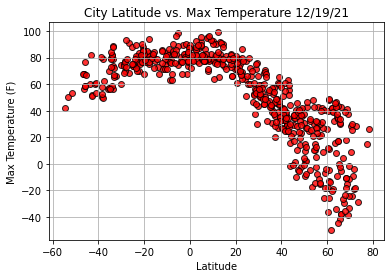

In [58]:
# Import the time Module
import time

# Build the scatter plot for latitude vs. max temperature.

#plt.scatter(lats,
#            max_temps,
 #           edgecolor="black", linewidths=1, marker="o",
 #           alpha=0.8, label="Cities")



plt.scatter(lats,max_temps,edgecolor="black", facecolor='red',linewidths=1, marker = "o", alpha = 0.8, label = "Cities")
   
# Incorporate other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))  
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save an image of the plot
plt.savefig("weather_data/Fig1.png")

# Show Plot
plt.show()


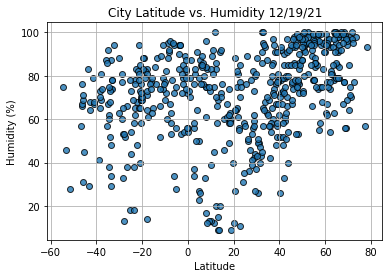

In [61]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

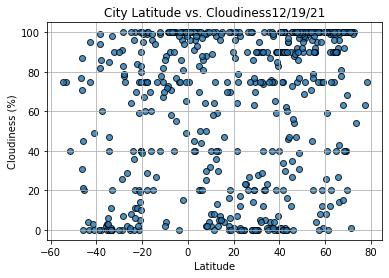

In [64]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

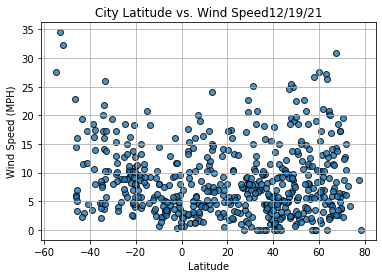

In [65]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed"+ time.strftime("%x"))
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()